In [2]:
import pandas as pd
import matplotlib.pyplot as plt

We can find crime statistics from the FBI. <br>
Data downloaded from https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/topic-pages/tables/table-1

In [3]:
fbi = pd.read_excel('fbi_crime.xls',skiprows = 3,nrows=20)
fbi.head()
# These column names are funky.

,Year,Population1,Violent crime2,Violent crime rate,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rape (revised definition3),Rape (revised definition) rate3,Rape (legacy definition4),Rape (legacy definition) rate4,...,Aggravated assault,Aggravated assault rate,Property crime,Property crime rate,Burglary,Burglary rate,Larceny- theft,Larceny- theft rate,Motor vehicle theft,Motor vehicle theft rate
0,1997,267783607,1636096,611.0,18208,6.8,NaN,NaN,96153,35.9,...,1023201,382.1,11558475,4316.3,2460526,918.8,7743760,2891.8,1354189,505.7
1,1998,270248003,1533887,567.6,16974,6.3,NaN,NaN,93144,34.5,...,976583,361.4,10951827,4052.5,2332735,863.2,7376311,2729.5,1242781,459.9
2,1999,272690813,1426044,523.0,15522,5.7,NaN,NaN,89411,32.8,...,911740,334.3,10208334,3743.6,2100739,770.4,6955520,2550.7,1152075,422.5
3,2000,281421906,1425486,506.5,15586,5.5,NaN,NaN,90178,32.0,...,911706,324.0,10182584,3618.3,2050992,728.8,6971590,2477.3,1160002,412.2
4,20015,285317559,1439480,504.5,16037,5.6,NaN,NaN,90863,31.8,...,909023,318.6,10437189,3658.1,2116531,741.8,7092267,2485.7,1228391,430.5


In [5]:
# Let's generate new ones programatically.
new_columns = fbi.columns.map(lambda x: x.replace('\n',' ').title().replace(' ',''))

Index(['Year', 'Population1', 'ViolentCrime2', 'ViolentCrimeRate',
       'MurderAndNonnegligentManslaughter',
       'MurderAndNonnegligentManslaughterRate', 'Rape(RevisedDefinition3)',
       'Rape(RevisedDefinition)Rate3', 'Rape(LegacyDefinition4)',
       'Rape(LegacyDefinition)Rate4', 'Robbery', 'RobberyRate',
       'AggravatedAssault', 'AggravatedAssaultRate', 'PropertyCrime',
       'PropertyCrimeRate', 'Burglary', 'BurglaryRate', 'Larceny-Theft',
       'Larceny-TheftRate', 'MotorVehicleTheft', 'MotorVehicleTheftRate'],
      dtype='object')

In [6]:
# Now to replace them in our dataframe.
newcol_dict = dict(zip(fbi.columns,new_columns))
fbi.rename(columns = newcol_dict, inplace = True)

In [7]:
# This data has some footnotes that are being read in as numbers. 
# We should make sure all years are 4 digits wide.
fbi['Year'] = fbi['Year'].map(lambda x: int(str(x)[:4]))

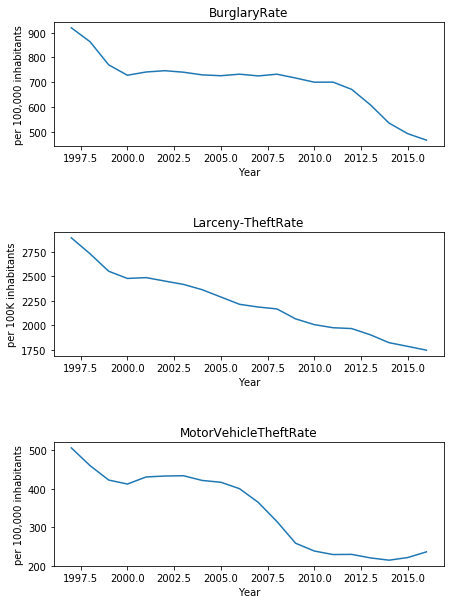

In [42]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize = (7, 10))

plt.subplots_adjust(hspace=.7)

plt.subplot(311)
plt.plot(fbi['Year'], fbi['BurglaryRate'])
plt.title('BurglaryRate')
plt.xlabel('Year')
plt.ylabel('per 100,000 inhabitants')
 
plt.subplot(312)
plt.plot(fbi['Year'], fbi['Larceny-TheftRate'])
plt.title('Larceny-TheftRate')
plt.xlabel('Year')
plt.ylabel('per 100K inhabitants')

plt.subplot(313)
plt.plot(fbi['Year'], fbi['MotorVehicleTheftRate'])
plt.title('MotorVehicleTheftRate')
plt.xlabel('Year')
plt.ylabel('per 100,000 inhabitants')
plt.show()

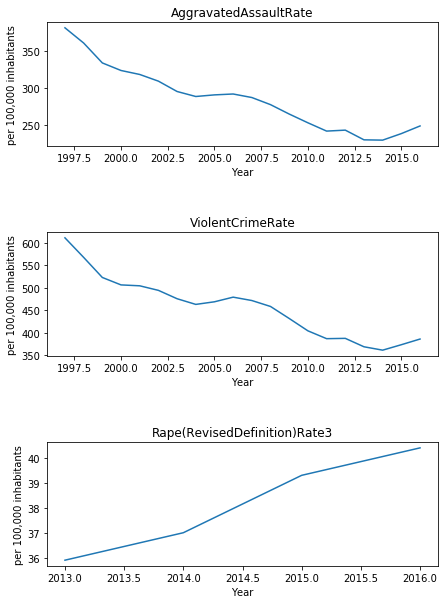

In [43]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize = (7, 10))

plt.subplots_adjust(hspace=.7)

plt.subplot(311)
plt.plot(fbi['Year'], fbi['AggravatedAssaultRate'])
plt.title('AggravatedAssaultRate')
plt.xlabel('Year')
plt.ylabel('per 100,000 inhabitants')

plt.subplot(312)
plt.plot(fbi['Year'], fbi['ViolentCrimeRate'])
plt.title('ViolentCrimeRate')
plt.xlabel('Year')
plt.ylabel('per 100,000 inhabitants')

plt.subplot(313)
plt.plot(fbi['Year'], fbi['Rape(RevisedDefinition)Rate3'])
plt.title('Rape(RevisedDefinition)Rate3')
plt.xlabel('Year')
plt.ylabel('per 100,000 inhabitants')

plt.show()